In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pynamicalsys import PlotStyler, HamiltonianSystem as HS

In [2]:
hs = HS(model="henon heiles")

In [3]:
E = 1 / 8  # Total energy of the system
x = 0  # Define the initial condition
y = -0.1
py = 0
px = np.sqrt(2 * (E - x**2 * y + y**3 / 3) - x**2 - y**2 - py**2)
py_range = (-0.3, 0.3)
PY = np.linspace(*py_range, 200)

dof = 2
q = np.array([x, y])
p = np.array([px, py])

total_time = 2000
num_intersections = 5000

In [4]:
hs.lyapunov(q, p, total_time)

array([ 0.03933896,  0.00256676, -0.00202733, -0.03987839])

In [5]:
PS = hs.poincare_section(q, p, num_intersections)

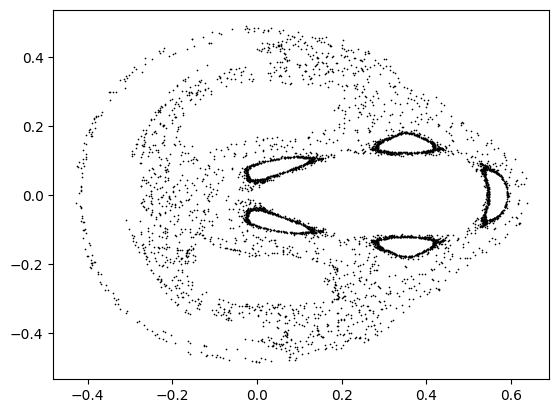

In [6]:
plt.plot(PS[:, 1], PS[:, 3], "ko", markersize=1.2, markeredgewidth=0)

In [7]:
hs.hurst_exponent(q, p, num_intersections)

array([0.99145805, 0.91583765, 0.80769931])

In [8]:
MLE = np.zeros_like(PY)
for i in range(PY.shape[0]):
    py = PY[i]
    px = np.sqrt(2 * (E - x**2 * y + y**3 / 3) - x**2 - y**2 - py**2)
    q = [x, y]
    p = [px, py]
    MLE[i] = hs.lyapunov(q, p, total_time, num_exponents=1)[0]

In [11]:
H = np.zeros((PY.shape[0], 3))
for i in range(PY.shape[0]):
    py = PY[i]
    px = np.sqrt(2 * (E - x**2 * y + y**3 / 3) - x**2 - y**2 - py**2)
    q = [x, y]
    p = [px, py]
    H[i] = hs.hurst_exponent(q, p, num_intersections)

<Figure size 640x480 with 0 Axes>

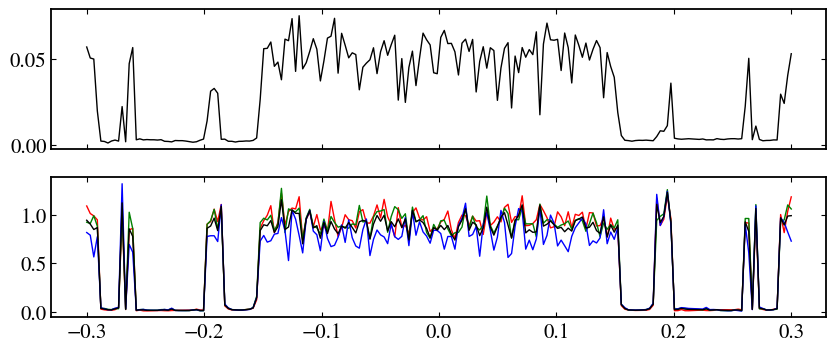

In [12]:
ps = PlotStyler(fontsize=18)
ps.apply_style()

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 4))

ax[0].plot(PY, MLE, "k-")
ax[1].plot(PY, H[:, 0], "r-")
ax[1].plot(PY, H[:, 1], "g-")
ax[1].plot(PY, H[:, 2], "b-")
ax[1].plot(PY, H.mean(axis=1), "k-")